In [1287]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("./Student_Performance.csv")
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [1288]:
df["Extracurricular Activities"] = df["Extracurricular Activities"].map({"Yes": 1, "No": 0})
df.loc[:, ["Previous Scores", "Performance Index"]] /= 10

df.head()

C:\Users\duduc\AppData\Local\Temp\ipykernel_10720\829470520.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[9.9 8.2 5.1 ... 8.3 9.7 7.4]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, ["Previous Scores", "Performance Index"]] /= 10


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,9.9,1,9,1,9.1
1,4,8.2,0,4,2,6.5
2,8,5.1,1,7,2,4.5
3,5,5.2,1,5,2,3.6
4,7,7.5,0,8,5,6.6


In [1289]:
idxs = list(range(df.shape[0]))
np.random.shuffle(idxs)
X = df.iloc[:, :-1].values[idxs]
y = df.iloc[:, -1].values[idxs]

p = 0.7
limit = int(p * X.shape[0])
X_train, X_test = X[:limit], X[limit:]
y_train, y_test = y[:limit], y[limit:]

In [1290]:
class LinearRegression:
    def __init__(self, accept_diff):
        self.accept_diff = accept_diff
        
    def fit(self, X: np.ndarray, y: np.ndarray, epochs: int, batch_size: int, print_every: int):
        self.coeff = np.zeros(X.shape[1] + 1)
        self.losses = []
        self.accs = []
        self.lrs = []

        steps = X.shape[0] // batch_size
        steps += int(steps * batch_size < X.shape[0])

        for epoch in range(epochs):

            total_loss = 0
            total_accuracy = 0

            for step in range(steps):
                X_batch = X[step * batch_size:((step + 1) * batch_size) if steps - step > 1 else None]
                y_batch = y[step * batch_size:((step + 1) * batch_size) if steps - step > 1 else None]

                result = self.coeff[0] + np.dot(self.coeff[1:], X_batch.T)
                errors = result - y_batch
                loss = np.mean(errors ** 2)
                accuracy = np.mean(errors < self.accept_diff)
                
                if print_every > 0 and not step % print_every:
                    print(f"------ step: {step} acc: {accuracy} loss: {loss}")

                grad = [(1 / errors.shape[0]) * np.sum(x_i * errors) for x_i in X_batch.T]
                grad.insert(0, (1 / errors.shape[0]) * np.sum(errors))

                self.coeff += -0.01 * np.array(grad)

                total_loss += loss
                total_accuracy += accuracy

            print(f"epoch: {epoch} acc: {total_accuracy / steps} loss: {total_loss / steps}")

            self.losses.append(total_loss / steps)
            self.accs.append(total_accuracy / steps)
    
    def predict(self, X: np.ndarray):
        return self.coeff[0] + np.dot(self.coeff[1:], X.T)
    
regressor = LinearRegression(accept_diff=0.1)
regressor.fit(X_train, y_train, epochs=10, batch_size=64, print_every=-1)
pred = regressor.predict(X_test)
print(np.mean(pred - y_test < regressor.accept_diff))

epoch: 0 acc: 0.5085700757575757 loss: 0.9501711272514031
epoch: 1 acc: 0.5075757575757576 loss: 0.34195996179419236
epoch: 2 acc: 0.5094223484848485 loss: 0.324239632531094
epoch: 3 acc: 0.5117897727272728 loss: 0.30827459318764194
epoch: 4 acc: 0.5126420454545455 loss: 0.2934594634457805
epoch: 5 acc: 0.514346590909091 loss: 0.27961156620293776
epoch: 6 acc: 0.516903409090909 loss: 0.26660990831982817
epoch: 7 acc: 0.5188920454545455 loss: 0.25436950295837163
epoch: 8 acc: 0.5204545454545455 loss: 0.2428267426502627
epoch: 9 acc: 0.5231534090909091 loss: 0.23193101431096583
0.5676666666666667


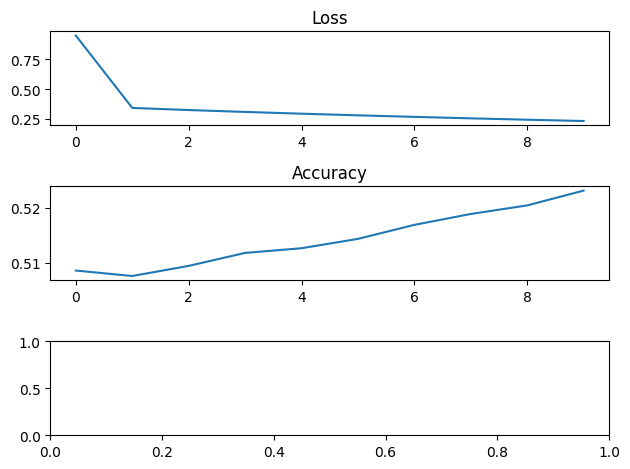

In [1291]:
plt.subplots(3, 1)
plt.subplot(3, 1, 1)
plt.plot(regressor.losses)
plt.title("Loss")
plt.subplot(3, 1, 2)
plt.plot(regressor.accs)
plt.title("Accuracy")
plt.tight_layout()
plt.show()